In [92]:
import numpy as np
import matplotlib.pyplot as plt

def population(age: np.array,
               dr_accident: float or np.array,
               dr_age: np.array,
               evolve: float or np.array,
               influx: np.array
              ) -> (np.array,np.array):
    """
    Returns the steady state population of the level, and the evolution flux
    
    :param age: age
    :param dr_accident: probability that one dies from non-age related cause in a year
    :param dr_age: probability that someone aged x will die before reaching age x+1 due to age related causes
    :param evolve: probability that someone aged x will evolve to next level before reaching age x+1
    :param influx: amount of people of age x evolving to the current level within the one year period
    """
    q = dr_accident + dr_age + evolve
    dr = dr_accident + dr_age
    evolve = q - dr
    N = np.ndarray(age.shape)
    Nevo = 0
    Ndie = 0
    
    N[0] = influx[0]
    for i in range(1,len(N)):
        N[i] = influx[i] + N[i-1]*(1-q[i-1])
        Nevo += N[i-1]*evolve[i-1]
        Ndie += N[i-1]*dr[i-1]
    
    evolveFlux = N*evolve
    evolveRate = Nevo/(Ndie+Nevo)
    
    return N,evolveFlux,evolveRate


In [86]:
def drAge(x: np.array,
          x0: float,
          k: float)-> np.array:
    """
    Returns the age related death rate 
    
    :param x: age
    :param x0: age when someone has 50% chance of dying within the next year
    :param k: parameter controlling the width of death rate
    """
    return 1/(1+np.exp(-k*(x-x0)))

C:\Users\tslin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


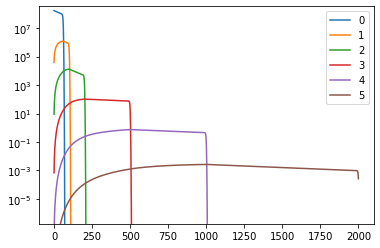

人口:
 凡人 = 7747692193.0 
 煉氣 = 88885847.0 
 築基 = 1512314.0 
 金丹 = 36612.0 
 元嬰 = 464.0 
 化神 = 3.0
晉級率:
 凡人->煉氣 = 0.01 
 煉氣->築基 = 0.0115 
 築基->金丹 = 0.0057 
 金丹->元嬰 = 0.0081 
 元嬰->化神 = 0.0042 
 化神->飛升 = 0.00224


In [138]:
x = np.linspace(0,2000,2001) # age
birth_per_yr = 1.75e8
evolveRateYr = 2.26e-4
difficulty = 3

# level 0 - 凡人
dr_accident = 0.01 
dr_age = drAge(x,60,0.5)
influx = np.zeros(x.shape)
influx[0] = birth_per_yr
N0,evolveFlux0,evolveRate0 = population(x,dr_accident,dr_age,evolveRateYr,influx)

# level 1 - 煉氣
dr_accident = 0.01 
dr_age = drAge(x,100,0.5)
N1,evolveFlux1,evolveRate1 = population(x,dr_accident,dr_age,evolveRateYr,evolveFlux0)

# level 2 - 築基
dr_accident = 0.01 
dr_age = drAge(x,200,0.5)
N2,evolveFlux2,evolveRate2 = population(x,dr_accident,dr_age,evolveRateYr/difficulty,evolveFlux1)

# level 3 - 金丹
dr_accident = 0.001 
dr_age = drAge(x,500,0.5)
N3,evolveFlux3,evolveRate3 = population(x,dr_accident,dr_age,evolveRateYr/difficulty**2,evolveFlux2)

# level 4 - 元嬰
dr_accident = 0.001 
dr_age = drAge(x,1000,0.5)
N4,evolveFlux4,evolveRate4 = population(x,dr_accident,dr_age,evolveRateYr/difficulty**3,evolveFlux3)

# level 5 - 化神
dr_accident = 0.001 
dr_age = drAge(x,2000,0.5)
N5,evolveFlux5,evolveRate5 = population(x,dr_accident,dr_age,evolveRateYr/difficulty**4,evolveFlux4)



plt.semilogy(x,N0,label='0')
plt.semilogy(x,N1,label='1')
plt.semilogy(x,N2,label='2')
plt.semilogy(x,N3,label='3')
plt.semilogy(x,N4,label='4')
plt.semilogy(x,N5,label='5')
plt.ylim([birth_per_yr/1e15,birth_per_yr*2])
plt.legend()
plt.show()

print('人口:\n 凡人 = '+str(round(sum(N0),0))+' \n 煉氣 = '+str(round(sum(N1),0))+' \n 築基 = '+str(round(sum(N2),0))+' \n 金丹 = '+str(round(sum(N3),0))+' \n 元嬰 = '+str(round(sum(N4),0))+' \n 化神 = '+str(round(sum(N5),0)))

print('晉級率:\n 凡人->煉氣 = '+str(round(evolveRate0,4))+' \n 煉氣->築基 = '+str(round(evolveRate1,4))+' \n 築基->金丹 = '+str(round(evolveRate2,4))+' \n 金丹->元嬰 = '+str(round(evolveRate3,4))+' \n 元嬰->化神 = '+str(round(evolveRate4,4))+' \n 化神->飛升 = '+str(round(evolveRate5,5)))

